# Transfer Learning with Data Augmentation


In [1]:
from keras.layers import Input, Dense, Flatten
from keras.layers import RandomFlip, RandomRotation, RandomZoom
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model, Sequential
from keras.utils import image_dataset_from_directory

from glob import glob

import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Downloading data
!wget -nc https://archive.org/download/food-5-k/Food-5K.zip

File ‘Food-5K.zip’ already there; not retrieving.



In [3]:
# Unzipping file
!unzip ./Food-5K.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Food-5K/training/0_364.jpg  
  inflating: Food-5K/training/1_163.jpg  
  inflating: Food-5K/training/0_370.jpg  
  inflating: Food-5K/training/0_416.jpg  
  inflating: Food-5K/training/1_605.jpg  
  inflating: Food-5K/training/1_836.jpg  
  inflating: Food-5K/training/1_188.jpg  
  inflating: Food-5K/training/1_822.jpg  
  inflating: Food-5K/training/0_1237.jpg  
  inflating: Food-5K/training/1_1223.jpg  
  inflating: Food-5K/training/1_1237.jpg  
  inflating: Food-5K/training/0_1223.jpg  
  inflating: Food-5K/training/1_349.jpg  
  inflating: Food-5K/training/1_70.jpg  
  inflating: Food-5K/training/1_64.jpg  
  inflating: Food-5K/training/0_628.jpg  
  inflating: Food-5K/training/0_166.jpg  
  inflating: Food-5K/training/1_375.jpg  
  inflating: Food-5K/training/1_413.jpg  
  inflating: Food-5K/training/0_600.jpg  
  inflating: Food-5K/training/1_407.jpg  
  inflating: Food-5K/training/0_614.jpg  
  inflating: Fo

In [4]:
# Moving files out of directory
!mv Food-5K/* .

mv: cannot move 'Food-5K/evaluation' to './evaluation': Directory not empty
mv: cannot move 'Food-5K/training' to './training': Directory not empty
mv: cannot move 'Food-5K/validation' to './validation': Directory not empty


In [5]:
# Creating new directory organization
!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/train/food
!mkdir data/train/non_food
!mkdir data/test/food
!mkdir data/test/non_food

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/train’: File exists
mkdir: cannot create directory ‘data/test’: File exists
mkdir: cannot create directory ‘data/train/food’: File exists
mkdir: cannot create directory ‘data/train/non_food’: File exists
mkdir: cannot create directory ‘data/test/food’: File exists
mkdir: cannot create directory ‘data/test/non_food’: File exists


In [6]:
# Moving the images into directories
!mv training/0*.jpg data/train/non_food
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/non_food
!mv validation/1*.jpg data/test/food

mv: cannot stat 'training/0*.jpg': No such file or directory
mv: cannot stat 'training/1*.jpg': No such file or directory
mv: cannot stat 'validation/0*.jpg': No such file or directory
mv: cannot stat 'validation/1*.jpg': No such file or directory


In [7]:
# Defining paths
train_path = 'data/train'
valid_path = 'data/test'

In [8]:
# Setting all image sizes
IMAGE_SIZE = [200, 200]

In [9]:
# Getting files's names
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

# Getting folders's names
folders = glob(train_path + '/*')

In [ ]:
# Number of classes
K = len(folders)
K

2

In [11]:
# Defining model
vgg_16 = VGG16(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False,
)

In [ ]:
# Freeze pretrained model weights
vgg_16.trainable = False

Using this as false means that the model will not train these weights when fit is called.


In [13]:
# Data augmentation
data_augmentation = Sequential(
    [
        RandomFlip('horizontal'),
        RandomRotation(0.1),
        RandomZoom(0.1),
    ]
)

In [ ]:
# Building model
i = Input(shape=(IMAGE_SIZE + [3]))
x = preprocess_input(i)
x = data_augmentation(x)
x = vgg_16(x)
x = Flatten()(x)
x = Dense(
    K,
    activation='softmax',  # Although there are only two targets, we use softmax to conform with the api
)(x)

model = Model(i, x)

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 200, 200)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 200, 200)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 200, 200)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 200, 200, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 200, 200, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 200, 200, 3)    │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 6, 6, 512)      │     14,714,688 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 18432)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2)              │         36,866 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,751,554 (56.27 MB)

 Trainable params: 36,866 (144.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

The api returns the data as a one-hot encoded matrix when flowing from directory, this is why we use categorical cross entropy. It is simply a way of making the model's structure more reusable.


In [16]:
# Compiling model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [17]:
# Setting batch size
BATCH_SIZE = 128

In [18]:
# Creating datasets
train_ds = image_dataset_from_directory(
    train_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = image_dataset_from_directory(
    valid_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [19]:
# Batching dataset
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
# Fitting the model
r = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 786ms/step - accuracy: 0.8521 - loss: 2.1934 - val_accuracy: 0.9830 - val_loss: 0.5349
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 427ms/step - accuracy: 0.9823 - loss: 0.3285 - val_accuracy: 0.9810 - val_loss: 0.4541
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - accuracy: 0.9846 - loss: 0.3483 - val_accuracy: 0.9740 - val_loss: 0.5919
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - accuracy: 0.9818 - loss: 0.3262 - val_accuracy: 0.9780 - val_loss: 0.4791
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - accuracy: 0.9882 - loss: 0.1738 - val_accuracy: 0.9780 - val_loss: 0.5550
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 421ms/step - accuracy: 0.9889 - loss: 0.1910 - val_accuracy: 0.9750 - val_loss: 0.6434
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - accuracy: 0.9892 - loss: 0.1433 - val_accuracy: 0.9730 - val_loss: 0.5911
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - accuracy: 0.9931 - loss: 0.1101 - val_accu

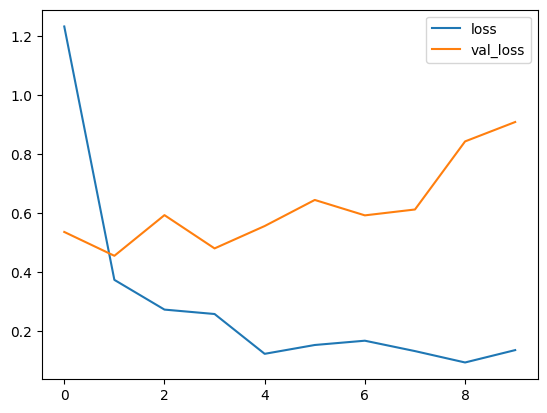

In [21]:
# Plotting loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

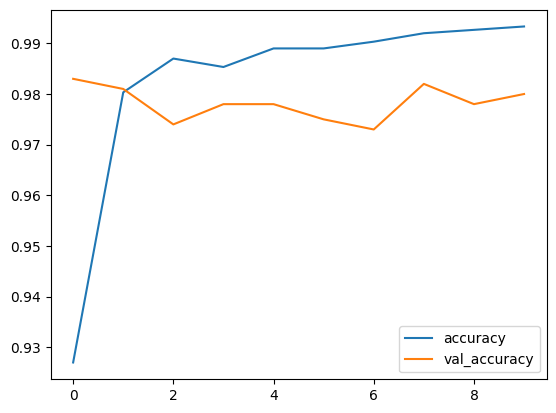

In [22]:
# Plotting accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()